# ICD Project

## Importing libraries

In [54]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
##from wordcloud import WordCloud
import contractions
import nltk
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')




[nltk_data] Downloading package stopwords to /home/marta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/marta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/marta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Load Dataset

In [55]:
data = pd.read_csv('./icd_marta_ana_scopus_edited.csv')

In [52]:
def unique_countries():
    return data['Country'].unique()

## **1.Exploratory data analysis**


- Exploratory Data Analysis (EDA) typically involves examining and visualizing various aspects of your dataset to gain insights into its structure and characteristics.
- Data exploration is a crucial step in any NLP project. It helps us understand the characteristics of the text data we are working with. 

In [3]:
# Display the first few rows of the DataFrame
data.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Casillo M.; Conte D.; Lombardi M.; Santaniello...,"Casillo, Mario (23026997200); Conte, Dajana (2...",23026997200; 22834021600; 57189595215; 5719787...,A Content-Based Recommender System for Hidden ...,2022,Lecture Notes in Networks and Systems,217,NaN,NaN,97,...,978-981162101-7,NaN,NaN,English,Lect. Notes Networks Syst.,Conference paper,Final,NaN,Scopus,2-s2.0-85118993536
1,Rani C.J.; Devarakonda N.,"Rani, Challapalli Jhansi (57870952400); Devara...",57870952400; 54999915100,An effectual classical dance pose estimation a...,2022,Microprocessors and Microsystems,95,NaN,104651,NaN,...,NaN,MIMID,NaN,English,Microprocessors Microsyst,Article,Final,NaN,Scopus,2-s2.0-85139595586
2,Lilan C.; Yongsheng C.,"Lilan, Chen (57213686650); Yongsheng, Chen (65...",57213686650; 6507741439,Intelligent recommendation system based on dec...,2022,Frontiers in Computational Neuroscience,16,NaN,1048047,NaN,...,NaN,NaN,NaN,English,Front. Comput. Neurosci.,Article,Final,All Open Access; Gold Open Access; Green Open ...,Scopus,2-s2.0-85142172754
3,Min H.; Yang B.; Allen D.G.; Grandey A.A.; Liu M.,"Min, Hanyi (57194326042); Yang, Baojiang (5801...",57194326042; 58019611700; 57202914326; 6603322...,Wisdom from the crowd: Can recommender systems...,2022,Personnel Psychology,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,English,Pers. Psychol.,Article,Article in press,NaN,Scopus,2-s2.0-85144128378
4,Dahroug A.; Vlachidis A.; Liapis A.; Bikakis A...,"Dahroug, Ahmed (57205197369); Vlachidis, Andre...",57205197369; 36440453700; 53264261900; 1164101...,Using dates as contextual information for pers...,2021,Journal of Information Science,47,1,NaN,82,...,NaN,JISCD,NaN,English,J Inf Sci,Article,Final,All Open Access; Green Open Access,Scopus,2-s2.0-85073977929


### Checking for duplicate values

In [4]:
data.duplicated().sum()

0

since the value of duplicate values(rows) is zero is not necessary to do anything

 
### Words Frequency Distribution

The code snippet counts the frequency of each word in the given sample text and plots the top 10 most frequent words


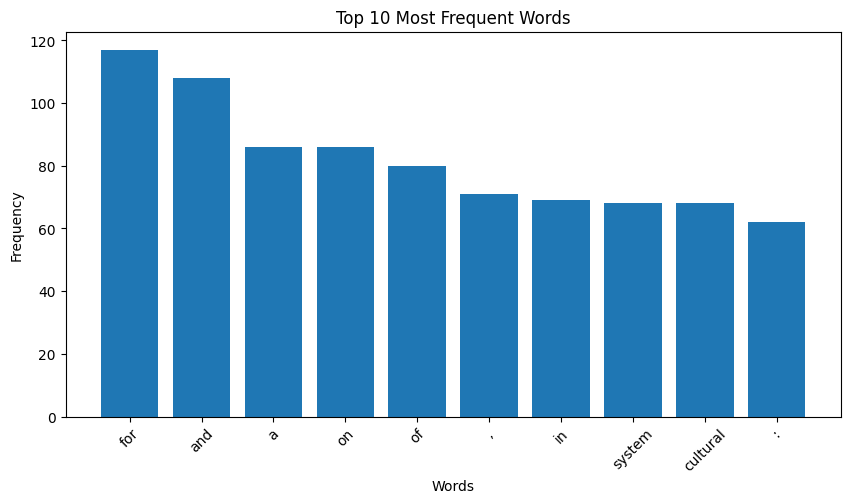

In [5]:

# Tokenize the text into words for each row in the 'text_column'
data['tokenized_text'] = data['Title'].apply(lambda x: word_tokenize(str(x).lower()))

# Flatten the list of tokenized words for all rows
all_words = [word for tokens in data['tokenized_text'] for word in tokens]

# Count the frequency of each word
word_freq = Counter(all_words)

# Prepare data for plotting
labels, values = zip(*word_freq.items())

# Sort the values in descending order
indSort = sorted(range(len(values)), key=lambda k: values[k], reverse=True)

# Rearrange the data
labels = [labels[i] for i in indSort]
values = [values[i] for i in indSort]

# Create the plot
plt.figure(figsize=(10, 5))
plt.bar(labels[:10], values[:10])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()



Since the top 10 most frequent words are stop words, and we can't retrieve valuable information from it they must be deleted.

In [6]:
# Concatenate all text data from all columns
all_text = ' '.join(data.astype(str).values.flatten())

### Character Frequency Distribution

Visualizing the data can provide additional insights. Let's create a simple word frequency distribution

/home/marta/Desktop/project-icd/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/marta/Desktop/project-icd/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24212 (\N{CJK UNIFIED IDEOGRAPH-5E94}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/marta/Desktop/project-icd/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/marta/Desktop/project-icd/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/marta/Desktop/project-icd/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: Us

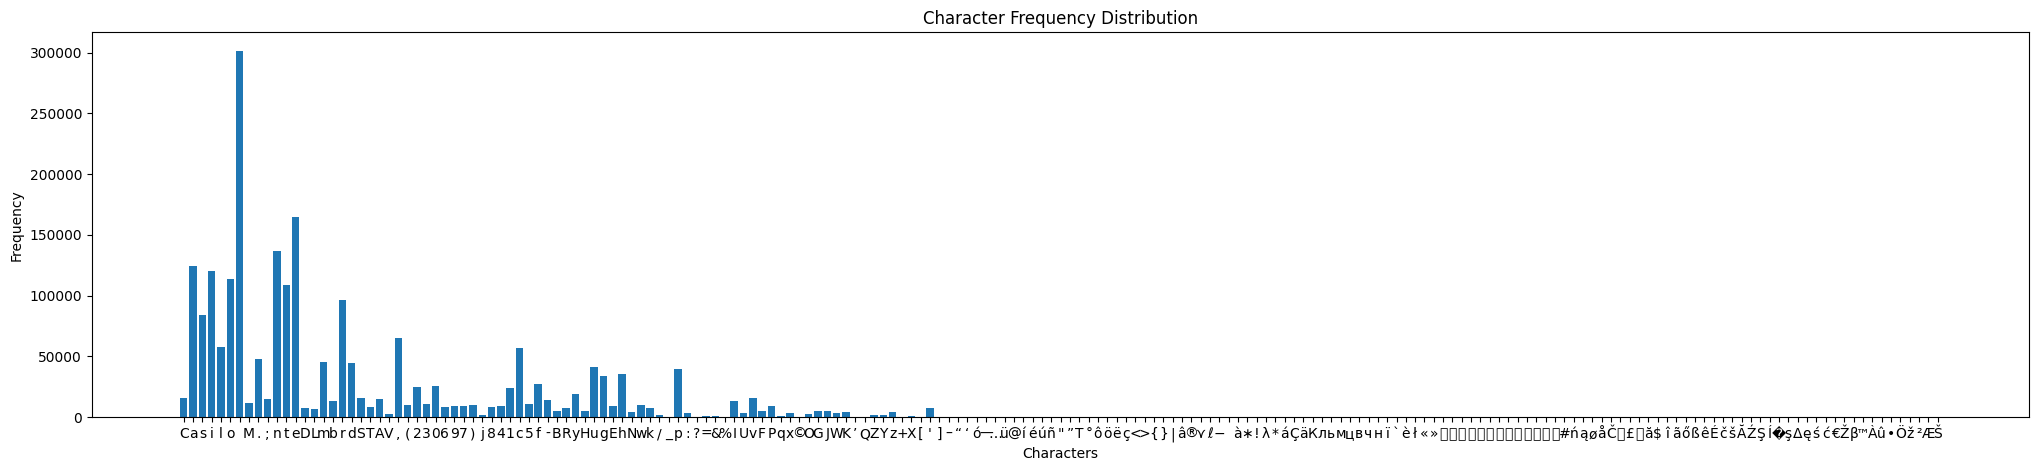

In [7]:

# Calculate the average word length
total_characters = sum(len(word) for word in all_text.split())
total_words = len(all_text.split())

# Count the frequency of each character
char_freq = Counter(all_text)

# Prepare data for plotting
char_labels, char_values = zip(*char_freq.items())

# Create the plot with a specified font
plt.figure(figsize=(25, 5))
plt.bar(char_labels, char_values)
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.title('Character Frequency Distribution')
plt.show()



With this graph we verified the existence of special characters and pontuation

### Number of Stopwords
The code snippet calculates the number of stopwords in the given sample text. Stopwords are commonly used words that are generally ignored in text data analysis.


In [8]:


# Get stopwords for the English language
stop_words = set(stopwords.words('english'))

# Count the number of stopwords in the entire dataset
num_stopwords = len([word for word in all_text.lower().split() if word in stop_words])

# Print or use the result as needed
print(f"Number of stopwords in the entire dataset: {num_stopwords}")

Number of stopwords in the entire dataset: 50887


### Number of Special Characters
The code snippet calculates the number of special characters (like punctuation marks) in the given sample text.

In [9]:
import string


# Count the number of special characters in the entire dataset
num_special_characters = len([char for char in all_text if char in string.punctuation])

# Print or use the result as needed
print(f"Number of special characters in the entire dataset: {num_special_characters}")

Number of special characters in the entire dataset: 179591


### Number of Uppercase Words
The code snippet calculates the number of words that are entirely in uppercase in the given sample text.

In [10]:

# Count the number of uppercase words in the entire dataset
num_uppercase_words = len([word for word in all_text.split() if word.isupper()])

# Print or use the result as needed
print(f"Number of uppercase words in the entire dataset: {num_uppercase_words}")

Number of uppercase words in the entire dataset: 36383


### Average Word Length
The code snippet calculates the average length of words in the given sample text.


In [11]:

# Function to calculate average word length for a given column
def calculate_avg_word_length(column_data):
    total_characters = sum(len(word) for text in column_data.astype(str) for word in text.split())
    total_words = sum(len(text.split()) for text in column_data.astype(str))
    return total_characters / total_words if total_words != 0 else 0

# Calculate average word length for each column
avg_word_lengths = {}

for column in data.columns:
    if data[column].dtype == 'O':  # Check if the column contains object (text) data
        avg_word_lengths[column] = calculate_avg_word_length(data[column])

# Print or use the results as needed
for column, avg_length in avg_word_lengths.items():
    print(f"Average word length for {column}: {avg_length}")

Average word length for Authors: 4.991277578245254
Average word length for Author full names: 8.905427905427905
Average word length for Author(s) ID: 11.226299694189603
Average word length for Title: 6.80456129236617
Average word length for Source title: 6.756379585326954
Average word length for Volume: 3.270186335403727
Average word length for Issue: 2.5689655172413794
Average word length for Art. No.: 3.7421602787456445
Average word length for Page start: 2.8989547038327528
Average word length for Page end: 2.9686411149825784
Average word length for DOI: 20.37630662020906
Average word length for Link: 138.41811846689896
Average word length for Affiliations: 6.877322677322677
Average word length for Authors with affiliations: 6.6062016792750855
Average word length for Abstract: 5.882441331972915
Average word length for Author Keywords: 8.34655722754218
Average word length for Index Keywords: 8.525868440502586
Average word length for Funding Details: 6.864496593489781
Average word leng

### Word cloud 

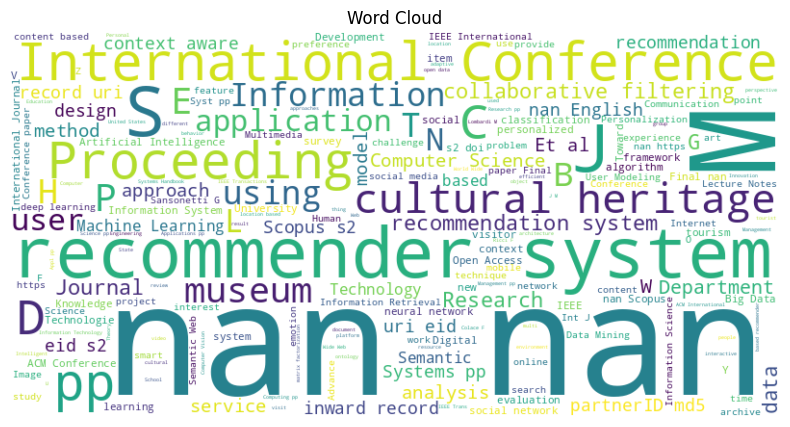

In [12]:
from wordcloud import WordCloud

# Concatenate all text data from all columns
all_text = ' '.join(data.astype(str).values.flatten())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In here we can see the that there are a lot of null numbers, and it's also possible to see the most frequent words

### Cheking for null values
The code snippet counts the frequency of each word in the given sample text and plots the top 10 most frequent words

In [13]:
# Checking for missing values
data.isna().sum()

Authors                           39
Author full names                 39
Author(s) ID                      39
Title                              0
Year                               0
Source title                       0
Volume                           101
Issue                            215
Art. No.                         219
Page start                        90
Page end                          90
Page count                        54
Cited by                           0
DOI                               60
Link                               0
Affiliations                      41
Authors with affiliations         41
Abstract                           0
Author Keywords                   66
Index Keywords                    84
Molecular Sequence Numbers       287
Chemicals/CAS                    287
Tradenames                       287
Manufacturers                    287
Funding Details                  191
Funding Texts                    192
References                        41
C

## **2.Noise Cleaning** 

### Remove useless columns in the context and columns with NaN values
Deleted the columns that don't have quality information for the analysis, and only bring in noise

In [14]:
columns_to_drop = ['Author full names', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by', 'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Sponsors', 'Molecular Sequence Numbers', 'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'ISBN', 'CODEN', 'PubMed ID']

data = data.drop(columns=columns_to_drop)
data.head(4)

,Authors,Author(s) ID,Title,Year,Source title,Abstract,Author Keywords,Index Keywords,Funding Details,Funding Texts,...,Conference code,ISSN,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID,tokenized_text
0,Casillo M.; Conte D.; Lombardi M.; Santaniello...,23026997200; 22834021600; 57189595215; 5719787...,A Content-Based Recommender System for Hidden ...,2022,Lecture Notes in Networks and Systems,The enhancement of Italian artistic and cultur...,E-tourism; Recommender system; Singular value ...,NaN,NaN,NaN,...,265119.0,23673370,English,Lect. Notes Networks Syst.,Conference paper,Final,NaN,Scopus,2-s2.0-85118993536,"[a, content-based, recommender, system, for, h..."
1,Rani C.J.; Devarakonda N.,57870952400; 54999915100,An effectual classical dance pose estimation a...,2022,Microprocessors and Microsystems,Automatic human action recognition remains an ...,Classification; Feature extraction; Indian cla...,Computer vision; Convolution; Convolutional ne...,NaN,NaN,...,NaN,01419331,English,Microprocessors Microsyst,Article,Final,NaN,Scopus,2-s2.0-85139595586,"[an, effectual, classical, dance, pose, estima..."
2,Lilan C.; Yongsheng C.,57213686650; 6507741439,Intelligent recommendation system based on dec...,2022,Frontiers in Computational Neuroscience,"How to recruit, test, and train the intelligen...",adaptive; classification algorithm; decision m...,Classification (of information); Efficiency; A...,Special Innovation Projects for Universities i...,This work was supported by the Major Projects ...,...,NaN,16625188,English,Front. Comput. Neurosci.,Article,Final,All Open Access; Gold Open Access; Green Open ...,Scopus,2-s2.0-85142172754,"[intelligent, recommendation, system, based, o..."
3,Min H.; Yang B.; Allen D.G.; Grandey A.A.; Liu M.,57194326042; 58019611700; 57202914326; 6603322...,Wisdom from the crowd: Can recommender systems...,2022,Personnel Psychology,Can algorithms that predict customer movie and...,Machine learning; Retention; Turnover; Work At...,NaN,NaN,NaN,...,NaN,00315826,English,Pers. Psychol.,Article,Article in press,NaN,Scopus,2-s2.0-85144128378,"[wisdom, from, the, crowd, :, can, recommender..."


## **2.1. Preprocess the dataset**


In [15]:


# Function to perform text preprocessing
def preprocess_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        # 1. Remove punctuation
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = re.sub(r'º', '', text)  # Remove the "º" character
        text = ' '.join(text.split())  # Remove extra spaces

        # 2. Convert the text to lowercase
        text = text.lower()
        
        # 4. Tokenization (dividing the text to a list of words ex: 'a ana e linda ' -> ['a', 'ana', 'e' ,'linda'] )
        words = word_tokenize(text)

        
        # 5. Stopword Removal (remove very common words like 'the', 'a' etc.)
        stop_words = set(stopwords.words('english'))
        # In here he is removing the stop words from the text 
        words = [word for word in words if word.lower() not in stop_words]

        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]
        

        
        # 5. Stemming(reduse the words to their root form ex 'running' -> 'run')
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]
        
        # Join the processed words back into a sentence
        processed_text = ' '.join(words)
        
        return processed_text
    else:
        # Return an empty string for non-string values
        return ''
    

#create a list with all the text cloumns 
text_columns = data.select_dtypes(include='object').columns.tolist()

# Apply text preprocessing to specified text columns
for col in text_columns:
    data[col] = data[col].apply(preprocess_text)
# Drop duplicate rows based on the entire row
data = data.drop_duplicates()

# Display the updated DataFrame
data.head()


,Authors,Author(s) ID,Title,Year,Source title,Abstract,Author Keywords,Index Keywords,Funding Details,Funding Texts,...,Conference code,ISSN,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID,tokenized_text
0,casillo cont lombardi santaniello troiano vale...,,contentbas recommend system hidden cultur heri...,2022,lectur note network system,enhanc italian artist cultur heritag big chall...,etour recommend system singular valu decomposit,,,,...,265119.0,,english,lect note network syst,confer paper,final,,scopu,,
1,rani cj devarakonda n,,effectu classic danc pose estim classif system...,2022,microprocessor microsystem,automat human action recognit remain intric is...,classif featur extract indian classic danc pos...,comput vision convolut convolut neural network...,,,...,NaN,,english,microprocessor microsyst,articl,final,,scopu,,
2,lilan c yongsheng c,,intellig recommend system base decis model arc...,2022,frontier comput neurosci,recruit test train intellig recommend system u...,adapt classif algorithm decis model intellig r...,classif inform effici adapt classif algorithm ...,special innov project univers guangdong wtscx ...,work support major project nation social scien...,...,NaN,,english,front comput neurosci,articl,final,open access gold open access green open access,scopu,,
3,min h yang b allen dg grandey aa liu,,wisdom crowd recommend system predict employe ...,2022,personnel psycholog,algorithm predict custom movi shop prefer also...,machin learn retent turnov work attitud,,,,...,NaN,,english,per psychol,articl,articl press,,scopu,,
4,dahroug vlachidi liapi bikaki lópeznor sacco p...,,use date contextu inform personalis cultur her...,2021,journal inform scienc,present semanticsbas mechan aim promot reflect...,annual commemor context awar cultur heritag hi...,recommend system semant annual commemor contex...,european union horizon research innov program ...,fund text author disclos receipt follow financ...,...,NaN,,english,j inf sci,articl,final,open access green open access,scopu,,


## download the file after preprocessing

In [16]:
import csv

file_path = 'preprocessed.csv'

with open(file_path, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerows(data)

print(f'Data has been saved to {file_path}')

Data has been saved to preprocessed.csv


## Word cloud 2

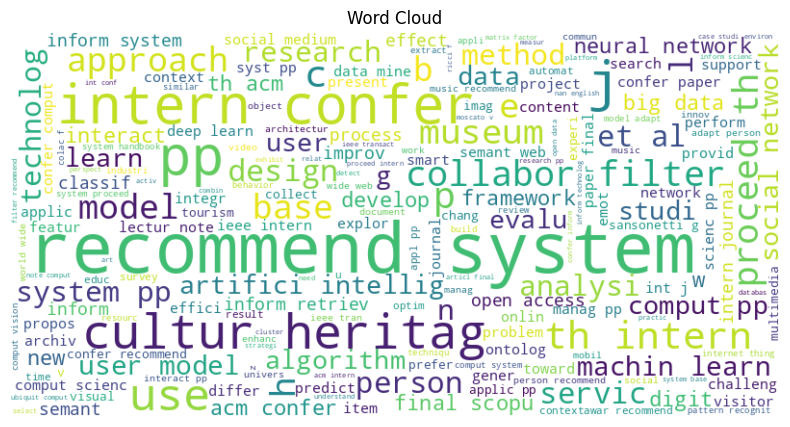

In [17]:
from wordcloud import WordCloud

# Concatenate all text data from all columns
all_text = ' '.join(data.astype(str).values.flatten())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

### Top 10 most frequent words after cleaning the data

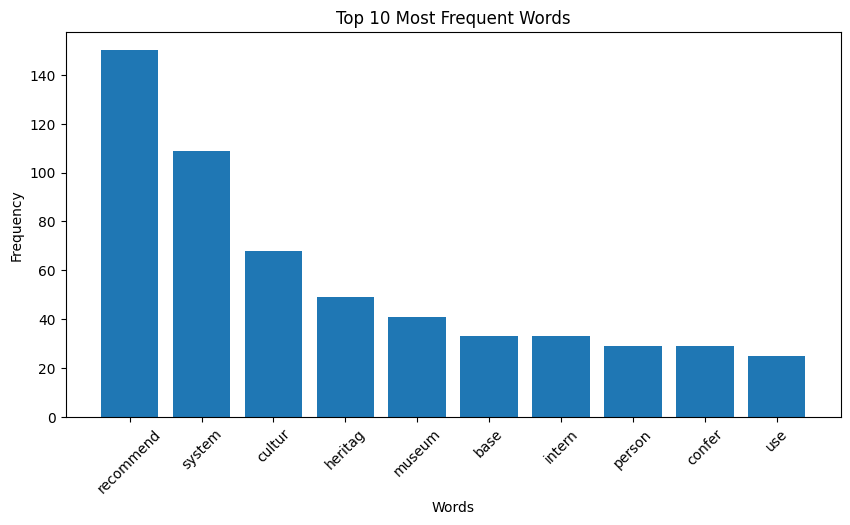

In [18]:
# Tokenize the text into words for each row in the 'text_column'
data['tokenized_text'] = data['Title'].apply(lambda x: word_tokenize(str(x).lower()))

# Flatten the list of tokenized words for all rows
all_words = [word for tokens in data['tokenized_text'] for word in tokens]

# Count the frequency of each word
word_freq = Counter(all_words)

# Prepare data for plotting
labels, values = zip(*word_freq.items())

# Sort the values in descending order
indSort = sorted(range(len(values)), key=lambda k: values[k], reverse=True)

# Rearrange the data
labels = [labels[i] for i in indSort]
values = [values[i] for i in indSort]

# Create the plot
plt.figure(figsize=(10, 5))
plt.bar(labels[:10], values[:10])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()


## **4.  Representative text**

## Bag of Words


In [19]:
column_to_vectorize = 'Title'

# Extract text data from the specified column
text_data = data[column_to_vectorize].tolist()

# Initialize the CountVectorizer with 1-grams
vectorizer = CountVectorizer(ngram_range=(1, 1))

# Fit and transform the text data
X = vectorizer.fit_transform(text_data)

# Convert the result to a DataFrame for better visualization
vectorized_data = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print("Bag of Words:", X.toarray())
# Display the vectorized data
print(vectorized_data.head(4))




Bag of Words: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
   abstract  academ  accept  accompani  accur  acm  across  activ  \
0         0       0       0          0      0    0       0      0   
1         0       0       0          0      0    0       0      0   
2         0       0       0          0      0    0       0      0   
3         0       0       0          0      0    0       0      0   

   activitybas  actual  ...  workshop  world  wrap  xai  year  young  zbmath  \
0            0       0  ...         0      0     0    0     0      0       0   
1            0       0  ...         0      0     0    0     0      0       0   
2            0       0  ...         0      0     0    0     0      0       0   
3            0       0  ...         0      0     0    0     0      0       0   

   zontal  çatalhöyük  回应aigc的信息资源管理学人思考  
0       0           0                  0  
1       0           0            

In [20]:
# Generate the heatmap
#plt.figure(figsize=(20, 1))  # Adjust the figure size
#sns.heatmap(vectorized_data, annot=True, cmap="YlGnBu", cbar=False)
#
#plt.show()

## Term Frequency 

Term Frequency measures how often a word appears in a document.

In [21]:
from collections import Counter
import pandas as pd

# Assuming 'Title' is the column name in your dataset
title_column = data['Title'].astype(str)

# Tokenize each document in the 'Title' column
tokenized_documents = [doc.split() for doc in title_column]

# Tokenize the first document in the 'Title' column
text_tokens = title_column.iloc[0].split()

# Count the frequency of each word
word_counts = Counter(text_tokens)

# Calculate the total number of words
total_words = len(text_tokens)

# Calculate Term Frequency (TF) for each word
term_frequency = {word: count / total_words for word, count in word_counts.items()}

print(f"Term Frequency: {term_frequency}")



Term Frequency: {'contentbas': 0.125, 'recommend': 0.125, 'system': 0.125, 'hidden': 0.125, 'cultur': 0.125, 'heritag': 0.125, 'site': 0.125, 'enhanc': 0.125}


## Inverse Document Frequency (IDF)

### Inverse Document Frequency (IDF)
IDF measures how important a term is across multiple documents. It's often used in tandem with TF.

In [22]:
import math

# Assuming 'Title' is the column name in your dataset
documents = data['Title'].astype(str).tolist()

# Convert all documents to lowercase
documents = [doc.lower() for doc in documents]

# Tokenize and count words for each document
tf_values = [Counter(doc.split()) for doc in documents]

# Calculate IDF values
all_words = set(word for doc in tf_values for word in doc.keys())
idf_values = {}
N = len(documents)

for word in all_words:
    df = sum(word in doc for doc in tf_values)
    idf_values[word] = math.log(N / df)

# Convert to DataFrame for better visualization
idf_df = pd.DataFrame(list(idf_values.items()), columns=['Word', 'IDF Value'])

# Sort the DataFrame by IDF Value in descending order for better visualization
idf_df = idf_df.sort_values('IDF Value', ascending=False)

# Display the table
print(idf_df)

           Word  IDF Value
0    automático   5.648974
494     develop   5.648974
496   manifesto   5.648974
498        catr   5.648974
499       autom   5.648974
..          ...        ...
153      museum   1.960095
183     heritag   1.757154
653      cultur   1.444282
312      system   0.995014
697   recommend   0.658542

[811 rows x 2 columns]


In [23]:
import math
from collections import Counter
import pandas as pd

# Assuming 'Title' is the column name in your dataset
documents = data['Title'].astype(str).tolist()

# Convert all documents to lowercase
documents = [doc.lower() for doc in documents]

# Tokenize and count words for each document
tf_values = [Counter(doc.split()) for doc in documents]

# Calculate IDF values
all_words = set(word for doc in tf_values for word in doc.keys())
idf_values = {}
N = len(documents)

for word in all_words:
    df = sum(word in doc for doc in tf_values)
    idf_values[word] = math.log(N / df)

# Calculate TF-IDF values
tf_idf_values = []

for tf in tf_values:
    tf_idf = {}
    for word, count in tf.items():
        tf_idf[word] = count * idf_values[word]
    tf_idf_values.append(tf_idf)

# Convert to DataFrame for better visualization
tf_idf_df = pd.DataFrame(tf_idf_values)

# Replace NaN with 0
tf_idf_df.fillna(0, inplace=True)

print(tf_idf_df)


     contentbas  recommend    system    hidden    cultur   heritag      site  \
0      4.550362   0.658542  0.995014  5.648974  1.444282  1.757154  4.550362   
1      0.000000   0.000000  0.995014  0.000000  0.000000  0.000000  0.000000   
2      0.000000   0.658542  0.995014  0.000000  0.000000  0.000000  0.000000   
3      0.000000   0.658542  0.995014  0.000000  0.000000  0.000000  0.000000   
4      0.000000   0.000000  0.000000  0.000000  1.444282  1.757154  0.000000   
..          ...        ...       ...       ...       ...       ...       ...   
279    0.000000   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
280    0.000000   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
281    0.000000   0.658542  0.995014  0.000000  1.444282  1.757154  0.000000   
282    0.000000   0.658542  0.000000  0.000000  0.000000  0.000000  0.000000   
283    0.000000   0.658542  0.995014  0.000000  0.000000  0.000000  0.000000   

       enhanc   effectu   classic  ... 

**IDF Frequency Distribution**

The code snippet plots the frequency of each word in the given sample text

In [24]:
# Using the DataFrame from the previous example (tf_idf_df)
#plt.figure(figsize=(12, 8))
#sns.heatmap(tf_idf_df, annot=True, cmap="YlGnBu", cbar=True)
#plt.title('TF-IDF Heatmap')
#plt.xlabel('Words')
#plt.ylabel('Documents')
#plt.show()

### 4. Term Frequency-Inverse Document Frequency (TF-IDF)
TF-IDF is a combination of TF and IDF, often used for text mining tasks.


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming 'Title' is the column name in your dataset
documents = data['Title'].astype(str).tolist()

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(documents)

# Convert the TF-IDF matrix to a dense array for better visualization
dense_tfidf_matrix = tfidf_matrix.toarray()

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(dense_tfidf_matrix, columns=vectorizer.get_feature_names_out())

print("TF-IDF Matrix:")
print(tfidf_df)

TF-IDF Matrix:
     abstract  academ  accept  accompani  accur  acm  across  activ  \
0         0.0     0.0     0.0        0.0    0.0  0.0     0.0    0.0   
1         0.0     0.0     0.0        0.0    0.0  0.0     0.0    0.0   
2         0.0     0.0     0.0        0.0    0.0  0.0     0.0    0.0   
3         0.0     0.0     0.0        0.0    0.0  0.0     0.0    0.0   
4         0.0     0.0     0.0        0.0    0.0  0.0     0.0    0.0   
..        ...     ...     ...        ...    ...  ...     ...    ...   
279       0.0     0.0     0.0        0.0    0.0  0.0     0.0    0.0   
280       0.0     0.0     0.0        0.0    0.0  0.0     0.0    0.0   
281       0.0     0.0     0.0        0.0    0.0  0.0     0.0    0.0   
282       0.0     0.0     0.0        0.0    0.0  0.0     0.0    0.0   
283       0.0     0.0     0.0        0.0    0.0  0.0     0.0    0.0   

     activitybas  actual  ...  workshop  world  wrap  xai  year  young  \
0            0.0     0.0  ...       0.0    0.0   0.0  0.0 

Visualization of the TF-IDF

In [26]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#
## Assume 'documents' is your list of text documents
#vectorizer = TfidfVectorizer()
#tfidf_matrix = vectorizer.fit_transform(documents)
#
## Convert to DataFrame
#df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
#
## Generate the heatmap
#plt.figure(figsize=(20, 5))  # Adjust the figure size
#sns.heatmap(df_tfidf, annot=True, cmap="YlGnBu", cbar=True)
#
#plt.show()



### 6. Sentiment Analysis
Sentiment Analysis aims to determine the attitude or emotion of the writer.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/marta/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


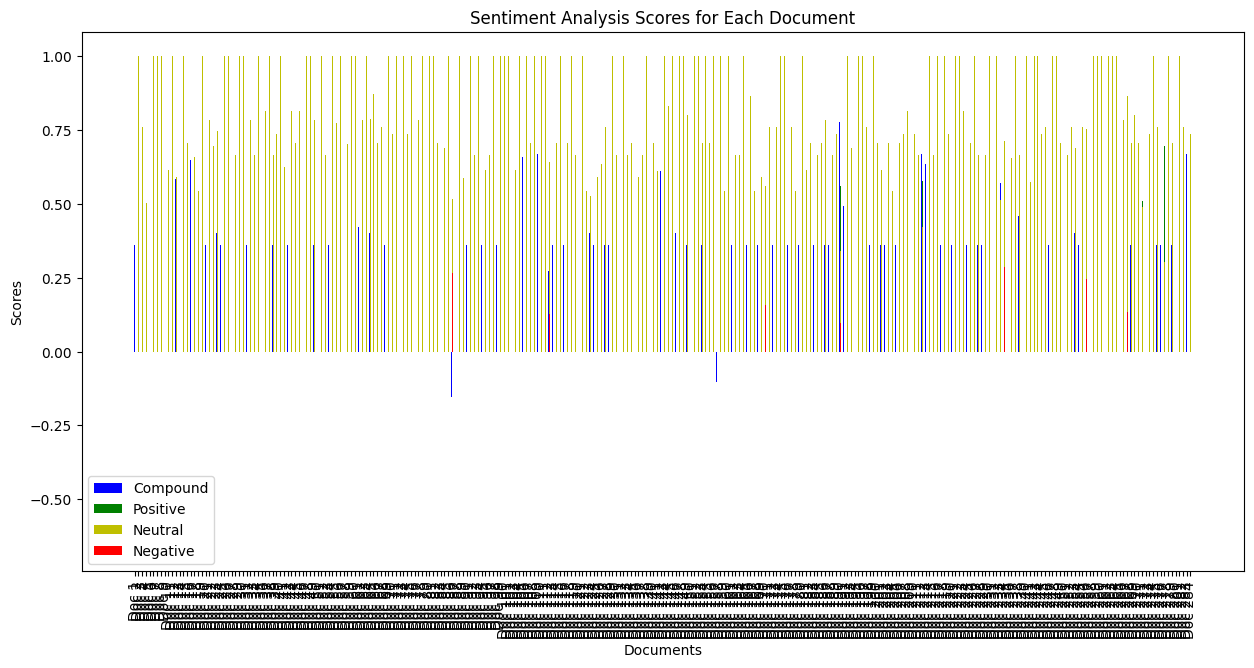

In [27]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Assuming 'Title' is the column name in your dataset
documents = data['Title'].astype(str).tolist()

# Download the VADER lexicon file
nltk.download('vader_lexicon')

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Initialize lists to store sentiment components
compound_scores = []
positive_scores = []
neutral_scores = []
negative_scores = []

# Analyze sentiment for each document in the list
for doc in documents:
    sentiment = sia.polarity_scores(doc)
    compound_scores.append(sentiment['compound'])
    positive_scores.append(sentiment['pos'])
    neutral_scores.append(sentiment['neu'])
    negative_scores.append(sentiment['neg'])

# Create the plot
labels = [f"Doc {i+1}" for i in range(len(documents))]
x = range(len(labels))

plt.figure(figsize=(15, 7))

plt.bar(x, compound_scores, width=0.2, label='Compound', color='b', align='center')
plt.bar(x, positive_scores, width=0.2, label='Positive', color='g', align='edge')
plt.bar(x, neutral_scores, width=0.2, label='Neutral', color='y', align='edge')
plt.bar(x, negative_scores, width=0.2, label='Negative', color='r', align='edge')

plt.xlabel('Documents')
plt.ylabel('Scores')
plt.title('Sentiment Analysis Scores for Each Document')
plt.xticks(x, labels, rotation='vertical')
plt.legend()
plt.show()


### 7. Word Embedding
Word Embeddings are a type of word representation that captures semantic meanings of words.

In [28]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Assuming 'Title' is the column name in your dataset
documents = data['Title'].astype(str).tolist()

# Tokenize and lowercase each document in the documents list
tokenized_documents = [word_tokenize(doc.lower()) for doc in documents]

# Train a Word2Vec model
model = Word2Vec(tokenized_documents, min_count=1)

# Access the word embedding for the word 'dados'
if 'dados' in model.wv:
    print("Word Embedding for 'dados':", model.wv['dados'])
else:
    print("The word 'dados' is not in the vocabulary.")


The word 'dados' is not in the vocabulary.


Visualization of the word Embeddings

/home/marta/Desktop/project-icd/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/marta/Desktop/project-icd/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24212 (\N{CJK UNIFIED IDEOGRAPH-5E94}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/marta/Desktop/project-icd/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/marta/Desktop/project-icd/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/marta/Desktop/project-icd/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: Us

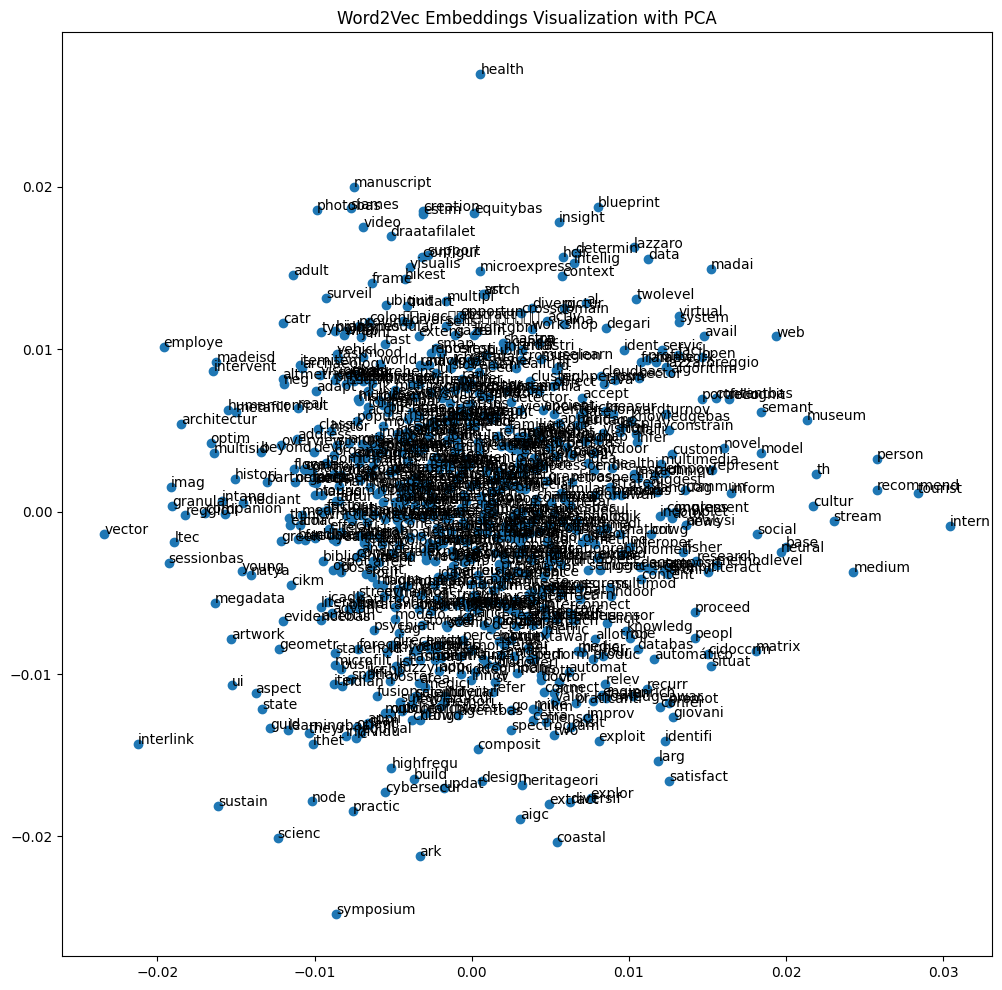

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Assuming 'Title' is the column name in your dataset
documents = data['Title'].astype(str).tolist()

# Tokenize and lowercase each document in the documents list
tokenized_documents = [word_tokenize(doc.lower()) for doc in documents]

# Train a Word2Vec model
model = Word2Vec(tokenized_documents, min_count=1)

# Get all the keys (words) from the vocabulary
words = list(model.wv.index_to_key)

# Get the corresponding vectors for each word
word_vectors = [model.wv[word] for word in words]

# Perform PCA to reduce dimensions
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

# Create a scatter plot
plt.figure(figsize=(12, 12))
plt.scatter(result[:, 0], result[:, 1])

# Annotate each point with its corresponding word
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title('Word2Vec Embeddings Visualization with PCA')
plt.show()


### 8. Part-of-Speech Tagging
Understanding the distribution of different parts-of-speech (nouns, verbs, adjectives, etc.) can provide insights into the grammatical structure of the text.

In [30]:
# Perform part-of-speech tagging using nltk
nltk.download('averaged_perceptron_tagger')
pos_tags = nltk.pos_tag(words)

# Count the frequency of each part-of-speech tag
pos_freq = Counter(tag for word, tag in pos_tags)
pos_freq

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/marta/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Counter({'NN': 557,
         'JJ': 157,
         'VBP': 28,
         'NNS': 12,
         'IN': 14,
         'VBD': 8,
         'VB': 4,
         'JJS': 3,
         'FW': 8,
         'VBZ': 6,
         'RB': 5,
         'NNP': 4,
         'RBR': 1,
         'CD': 2,
         'JJR': 2})

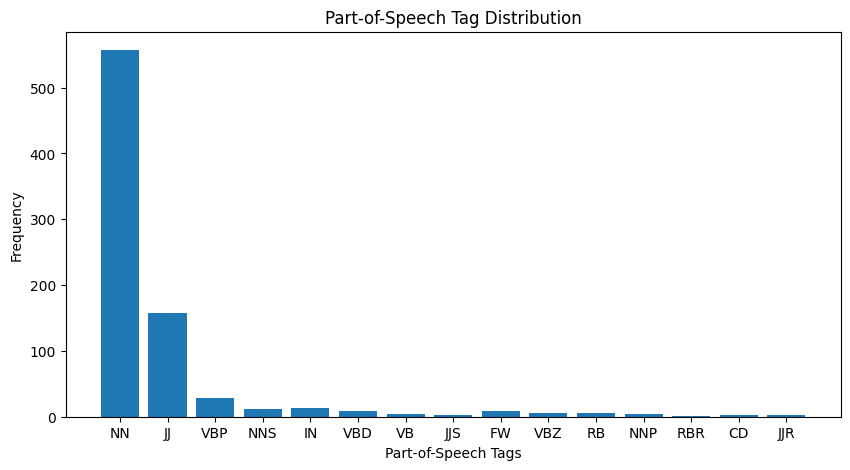

In [31]:
# Create the plot
plt.figure(figsize=(10, 5))
plt.bar(pos_freq.keys(), pos_freq.values())
plt.xlabel('Part-of-Speech Tags')
plt.ylabel('Frequency')
plt.title('Part-of-Speech Tag Distribution')
plt.show()

## **5.Modelação de Tópicos**

### 5.1 Latent Dirichlet Allocation (LDA)

In [32]:
document = data['Title']
document

0      contentbas recommend system hidden cultur heri...
1      effectu classic danc pose estim classif system...
2      intellig recommend system base decis model arc...
3      wisdom crowd recommend system predict employe ...
4      use date contextu inform personalis cultur her...
                             ...                        
282    studi individu mobil pattern base individu fam...
283                     museum app trigger user reection
284    appli implicit recommend system prepar visit c...
285    recommend sequenc point interest group user mo...
286    similar metric social network analysi content ...
Name: Title, Length: 284, dtype: object

In [33]:
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess

def preprocess_data(documents):
    
    
    # Tokenize the documents 
    texts = [[word for word in simple_preprocess(str(doc))] for doc in documents]
    
    # Return the list of tokenized and preprocessed texts
    return texts


In [34]:

# Process the documents using the previously defined preprocessing function
processed_texts = preprocess_data(document)
processed_texts
print(processed_texts)

[['contentbas', 'recommend', 'system', 'hidden', 'cultur', 'heritag', 'site', 'enhanc'], ['effectu', 'classic', 'danc', 'pose', 'estim', 'classif', 'system', 'employ', 'convolut', 'neural', 'network', 'long', 'shortterm', 'memori', 'cnnlstm', 'network', 'video', 'sequenc'], ['intellig', 'recommend', 'system', 'base', 'decis', 'model', 'archiv', 'translat', 'task'], ['wisdom', 'crowd', 'recommend', 'system', 'predict', 'employe', 'turnov', 'destin'], ['use', 'date', 'contextu', 'inform', 'personalis', 'cultur', 'heritag', 'experi'], ['onlin', 'staypoint', 'detect', 'highfrequ', 'locat', 'updat', 'stream'], ['person', 'digit', 'ecomuseum', 'case', 'proseleusi'], ['connect', 'museum', 'citi', 'environ', 'visitor', 'perspect'], ['petrou', 'bone', 'repositori', 'ancient', 'biomolecul', 'investig', 'biosystemat', 'signal', 'sheep', 'petrou', 'bone', 'use', 'geometr', 'morphometr'], ['recstudio', 'toward', 'highlymodular', 'recommend', 'system'], ['digit', 'inform', 'manag', 'mechan', 'sport'

In [35]:
from gensim import corpora
# Create Dictionary
id2word = corpora.Dictionary(processed_texts)

In [36]:
# Create Corpus
texts = processed_texts
texts

[['contentbas',
  'recommend',
  'system',
  'hidden',
  'cultur',
  'heritag',
  'site',
  'enhanc'],
 ['effectu',
  'classic',
  'danc',
  'pose',
  'estim',
  'classif',
  'system',
  'employ',
  'convolut',
  'neural',
  'network',
  'long',
  'shortterm',
  'memori',
  'cnnlstm',
  'network',
  'video',
  'sequenc'],
 ['intellig',
  'recommend',
  'system',
  'base',
  'decis',
  'model',
  'archiv',
  'translat',
  'task'],
 ['wisdom',
  'crowd',
  'recommend',
  'system',
  'predict',
  'employe',
  'turnov',
  'destin'],
 ['use',
  'date',
  'contextu',
  'inform',
  'personalis',
  'cultur',
  'heritag',
  'experi'],
 ['onlin', 'staypoint', 'detect', 'highfrequ', 'locat', 'updat', 'stream'],
 ['person', 'digit', 'ecomuseum', 'case', 'proseleusi'],
 ['connect', 'museum', 'citi', 'environ', 'visitor', 'perspect'],
 ['petrou',
  'bone',
  'repositori',
  'ancient',
  'biomolecul',
  'investig',
  'biosystemat',
  'signal',
  'sheep',
  'petrou',
  'bone',
  'use',
  'geometr',
  

In [37]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [38]:
from gensim.models.ldamodel import LdaModel
# Set number of topics
num_topics = 10

lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=50, alpha=1.0, eta=0.001, per_word_topics=True)


In [39]:
# Print the keywords for each topic
print(lda_model.print_topics())

[(0, '0.100*"recommend" + 0.099*"person" + 0.063*"system" + 0.060*"toward" + 0.057*"semant" + 0.046*"model" + 0.031*"studi" + 0.027*"object" + 0.023*"awar" + 0.023*"case"'), (1, '0.102*"museum" + 0.031*"recommend" + 0.028*"tour" + 0.028*"contextawar" + 0.028*"deep" + 0.028*"tourist" + 0.028*"algorithm" + 0.028*"use" + 0.023*"emot" + 0.023*"machin"'), (2, '0.136*"recommend" + 0.073*"system" + 0.067*"digit" + 0.038*"base" + 0.034*"smart" + 0.029*"industri" + 0.026*"model" + 0.024*"interest" + 0.023*"document" + 0.020*"support"'), (3, '0.098*"intern" + 0.081*"confer" + 0.074*"th" + 0.058*"data" + 0.049*"inform" + 0.043*"workshop" + 0.031*"knowledg" + 0.031*"proceed" + 0.023*"system" + 0.020*"manag"'), (4, '0.114*"learn" + 0.102*"use" + 0.078*"approach" + 0.059*"technolog" + 0.058*"recommend" + 0.038*"prefer" + 0.033*"classif" + 0.027*"place" + 0.022*"artwork" + 0.022*"assess"'), (5, '0.133*"recommend" + 0.066*"experi" + 0.055*"system" + 0.051*"network" + 0.047*"music" + 0.032*"larg" + 0.0

In [44]:
lda_model.show_topics()[0]

(0,
 '0.100*"recommend" + 0.099*"person" + 0.063*"system" + 0.060*"toward" + 0.057*"semant" + 0.046*"model" + 0.031*"studi" + 0.027*"object" + 0.023*"awar" + 0.023*"case"')

In [80]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)

Coherence Score: 0.5200245245026724


In [81]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [85]:
from gensim.corpora import Dictionary

# Assuming 'processed_texts' is your list of tokenized and preprocessed documents
dictionary = Dictionary(processed_texts)


pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

TypeError: drop() takes from 1 to 2 positional arguments but 3 were given